## Working with Tensorflow
In this assignment, you will be familiarized with the usage of the tensorflow library and how to build a model for the MNIST database in two ways
*   using the inbuilt layers in tensorflow
*   using custom layers to replicate the same result



In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

## Loading and preprocessing the Data
We will directly be using the dataset included in tensorflow library
A detailed description of data is given at (https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data)


In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Heres how the data looks

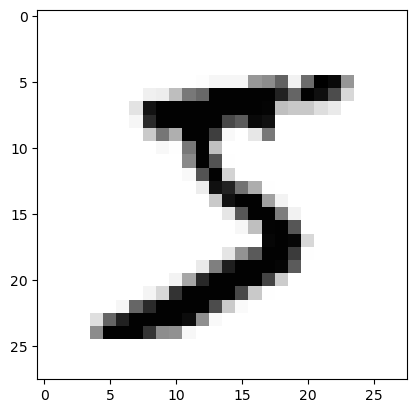

In [8]:
plt.imshow(x_train[0],cmap= 'Greys')

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

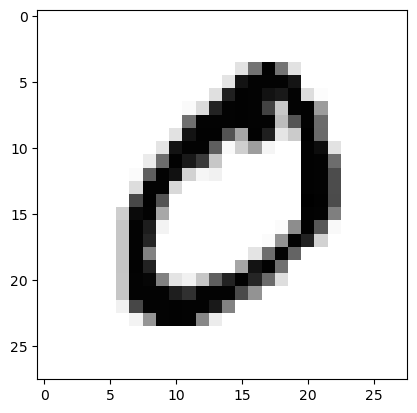

In [10]:
plt.imshow(x_train[1],cmap= 'Greys')

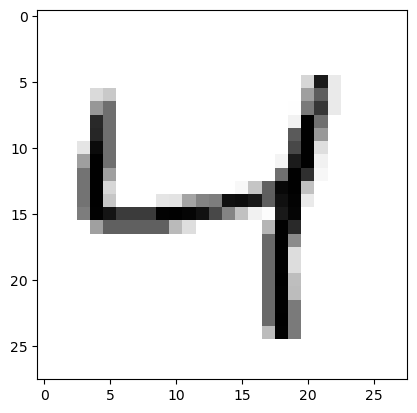

In [11]:
plt.imshow(x_train[2],cmap= 'Greys')

# Making a simple feedforward network
As you have seen in the second week a simple feedfordward network works well to solve MNIST.<br/>
The following is a simple feedforward model with three layers:
* a flatten layer to convert our 28x28 images into a single array of length 784
* a dense layer of 128 neurons with the relu activation function
* finally a dense layer of 10 neurons with the softmax activation to get a distribution between the digits

In [12]:
# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

f:\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8610 - loss: 0.4916 - val_accuracy: 0.9546 - val_loss: 0.1622
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9574 - loss: 0.1476 - val_accuracy: 0.9642 - val_loss: 0.1213
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9718 - loss: 0.0944 - val_accuracy: 0.9700 - val_loss: 0.1009
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9797 - loss: 0.0654 - val_accuracy: 0.9757 - val_loss: 0.0855
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9856 - loss: 0.0482 - val_accuracy: 0.9740 - val_loss: 0.0859
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9733 - loss: 0.0871
Test accuracy: 0.9771999716758728


## Making Custom Layers
You can go through this
<a href = 'https://www.tensorflow.org/tutorials/customization/custom_layers'> documentation </a> to get a feel for how to implement a custom layer

* Create a CustomDenseLayer with a Relu Activation
* Create a CustomDenseLayer with a Softmax Activation
* Create a CustomFlatten Layer

Altough we have provided solutions in the Next Cell Try to figure this out on your own.


In [19]:
class CustomDenseReluLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(CustomDenseReluLayer, self).__init__()
        #TODO
        self.units=units

    def build(self, input_shape):
        #TODO
        self.w=self.add_weight(shape=(input_shape[-1],self.units),initializer='random_normal',trainable=True)
        self.b=self.add_weight(shape=(self.units,),initializer='zeros',trainable=True)

    def call(self, inputs):
        #TODO
        z=tf.matmul(inputs,self.w)+self.b
        z=tf.nn.relu(z)
        return z

class CustomDenseSoftmaxLayer(tf.keras.layers.Layer):
    def __init__(self, units):
        super(CustomDenseSoftmaxLayer, self).__init__()
        #TODO
        self.units=units

    def build(self, input_shape):
        #TODO
        self.w=self.add_weight(shape=(input_shape[-1],self.units),initializer="random_normal",trainable=True)
        self.b=self.add_weight(shape=(self.units,),initializer='zeros',trainable=True)

    def call(self, inputs):
        #TODO
        z=tf.matmul(inputs,self.w)+self.b
        z=tf.nn.softmax(z)
        return z
    
class CustomFlattenLayer(tf.keras.layers.Layer):
    def call(self, inputs):
        #TODO
        
        return tf.reshape(inputs, (tf.shape(inputs)[0],-1))
    

## Using out custom layers to Build a model for MNIST

In [20]:
# Example usage of the custom dense layer
model = Sequential([
    CustomFlattenLayer(),
    CustomDenseReluLayer(128),
    CustomDenseSoftmaxLayer(10)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8435 - loss: 0.5537 - val_accuracy: 0.9516 - val_loss: 0.1676
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9554 - loss: 0.1521 - val_accuracy: 0.9588 - val_loss: 0.1391
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9715 - loss: 0.0961 - val_accuracy: 0.9685 - val_loss: 0.1026
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9801 - loss: 0.0703 - val_accuracy: 0.9697 - val_loss: 0.1000
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9841 - loss: 0.0537 - val_accuracy: 0.9721 - val_loss: 0.0941
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9688 - loss: 0.1049
Test accuracy: 0.9728999733924866


# Assignment
* Load and preprocess Boston housing dataset
* build a Linear Regression model for it and optimize it using tensorflow (its basically a neural network with a single neuron and no activaton)
* build a Feedforward network for it you can expirement around with no of layers and and neurons in each layer and different activation functions <br/>





In [23]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [31]:
boston_data=boston_housing.load_data()
boston_data

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step


((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.

In [32]:
(X_train, y_train), (X_test, y_test) = boston_data

In [38]:
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}")

Training data shape: (404, 13), Training labels shape: (404,)
Testing data shape: (102, 13), Testing labels shape: (102,)


In [ ]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [41]:
# Linear Regression Model (Single Neuron)
def build_linear_reg_model(input_shape):
    model=tf.keras.Sequential([
        
        tf.keras.layers.InputLayer(input_shape=input_shape),
        tf.keras.layers.Dense(1, activation=None)
        
    ])
    return model


In [45]:
model_linear=build_linear_reg_model(X_train.shape[1:])
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
loss="mean_squared_error"
model_linear.compile(optimizer,loss)
history_linear=model_linear.fit(X_train,y_train,epochs=200,batch_size=32,validation_data=(X_test,y_test))
mse_linear=model_linear.evaluate(X_test,y_test)
print(f"Linear Regression Model Mean Squared Error: {mse_linear}")

f:\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 14951.1963 - val_loss: 2163.7405
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1147.6636 - val_loss: 1045.0972
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1142.5391 - val_loss: 545.1927
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 510.0278 - val_loss: 505.8585
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 418.1589 - val_loss: 372.2034
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 311.8089 - val_loss: 310.1593
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 272.7337 - val_loss: 291.6060
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 251.0942 - val_loss: 276.3362
Epoch 9/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 235.9665 - val_loss: 253.0440
Epoch 10/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 228.3557 - val_loss: 244.6557
Epoch 11/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 215.1853 - val_loss: 230.8469
Ep

In [52]:
# Feedforward Neural Network

def build_feedforward_model(input_shape,num_neuron,num_layer):
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
    for _ in range(num_layer):
        model.add(tf.keras.layers.Dense(num_neuron,activation='relu'))
    
    model.add(tf.keras.layers.Dense(1,activation=None))
    return model

num_layer=3
num_neuron=64

model_ffnn=build_feedforward_model(X_train.shape[1:],num_neuron,num_layer)
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
loss="mean_squared_error"
model_ffnn.compile(optimizer=optimizer,loss=loss)
history_ffnn=model_ffnn.fit(X_train,y_train,epochs=200,batch_size=32,validation_data=(X_test,y_test))
mse_ffnn=model_ffnn.evaluate(X_test,y_test)
print(f"Feedforward Neural Network Model Mean Squared Error: {mse_ffnn}")
        

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 2861.6169 - val_loss: 263.3358
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 186.2282 - val_loss: 85.5224
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 113.3437 - val_loss: 78.4376
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 100.7558 - val_loss: 74.4733
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 71.7874 - val_loss: 71.7188
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 76.1674 - val_loss: 69.4041
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 64.5734 - val_loss: 65.0826
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 65.5758 - val_loss: 62.9922
Epoch 9/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 74.6689 - val_loss: 62.2567
Epoch 10/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 59.5468 - val_loss: 60.3776
Epoch 11/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 56.5516 - val_loss: 63.7813
Epoch 12/200
13/13 ━━━━━

# Bonus Assignment 
* Try solving one more random dataset from kaggle/tensorflow datasets